# Day 1: Introduction to Python for data analysis and data visualization

This tutorial is meant for absolute beginners and it will cover the essentials to utilize python for scientific data analysis and visualization. 
In day 1 we will get familiar with Anaconda, python, Vscode and ipynb. Additionally, we will learn how to read 'excel' data and how to plot it. 

## 1. What is Python (and how can you use it)

Python is an open source (i.e. free) high-level  (i.e. easy syntax) programming language (i.e. you need a compiler and an IDE) [Ref 1](https://www.python.org/about/).

In this tutorial your compiler is provided by **Anaconda** which is some sort of bundle whose purpose is to make the Python experience as close to using a regular software as possible. 

The IDE, which stands for Integrated Development Environment, can be anything, from notepad to an iPython Notebook like the one you're seeing. Programming has become so much easier because of IDE's like **VScode**, this is what we will use. Let's spend sometime getting familiar with VSCode

## 2. Getting started with Python

All python files have **.py** extensions; however, for most of our purposes we won't need to program with .py files. We can work with **.ipynb** files like the one I'm using now. To make a new .ipynb just click on "New file", type the name of the file you want to create and include the .ipynb extension.

### 2.1 High-level structure of a code

In this case we have cells that can be code (Python) or text (Markdown). In the code cells, the main things you will find can be cathegorized as packages, variables and functions. There are also classes, but we won't get into that. 

### 2.2 The packages that we will use

In [2]:
import pandas as pd #to open csv files and similar 
import numpy as np #to manipulate vectors and any other array of numbers

import matplotlib.pyplot as plt #for plotting

plt.style.use('dark_background') #dark background, optional

### 2.3 Variables

In [3]:
number_1 = 3.14
# number_2 = 2*a

string = 'This is a string'
#another_stirng = string[0]

array = np.array([1,2,3]) #this is a 1d array (vector )
#How would you get the '2' inside array

#array = np.array([1,2,3], [3,2,1]) #now it is a 2d array (matrix)


In [81]:
#make an array of numbers from 0 to 20 spaced by 1, i.e. [0,1, 2,...,20]
#make an array of numbers from 0 to 20 but with a 100 points, i.e. [0, 0.2,...,20]

## 3. Python for Data Analysis

The case study for this hour will be analysis and plotting the data from some solar cells measurements, and extraxcting the relevant information.

In [4]:
#This entire cell is just to locate files more easily
from tkinter import filedialog
from tkinter import *

root = Tk()
root.withdraw()

directory = filedialog.askdirectory() 
#filename = filedialog.askopenfilename()
#filename



2023-07-25 09:27:56.967 python[44924:19015926] +[CATransaction synchronize] called within transaction


In [23]:
import glob

filenames = glob.glob(directory+'/*') #get all the filenames in a given directory
#filenames

In [22]:
df = pd.read_excel(filenames[0], usecols=[0,1,2])#, sheet_name=0, header=0, names=None, index_col=None, usecols=None)
df.head()

#df = pd.read_csv(filename, usecols = [x for x in range(7)]) #reading the csv file with pandas
#df.head() #showing the first 5 rows

WARNING *** file size (55480) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Current,Voltage,POWER
0,-0.000031,-1.00,0.000031
1,-0.000028,-0.99,0.000028
2,-0.000027,-0.98,0.000027
3,-0.000026,-0.97,0.000025
4,-0.000025,-0.96,0.000024


In [77]:
## Rename columns

In [24]:
#saving the values in the columns into arrays
voltage_light = df['Voltage'].values
current_light = df['Current'].values

power_light = df['POWER'].values

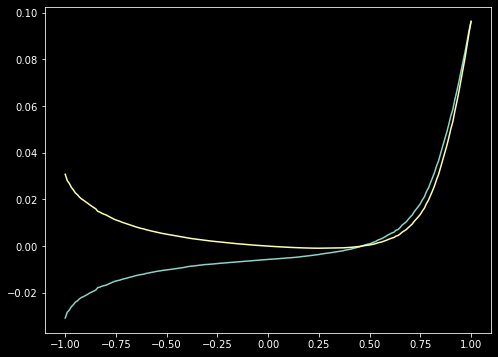

In [27]:
plt.figure(figsize=(8,6)) #figure size

plt.plot(voltage_light, 1e3*current_light, label = 'Current')
plt.plot(voltage_light, 1e3*power_light, label = 'Power')

#plt.hlines(0, -1, 1, color = 'gray', alpha = 0.75)

#plt.ylim([-0.5, 0.5]) #how can we choose the limits?
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.legend(loc='best', fontsize=15)

#plt.title('Solar Cells Data', fontsize = 18)
#plt.xlabel('Voltage [V]', fontsize=18)
#plt.ylabel('Current [mA]', fontsize = 18)

plt.show()

## 4. Resources

### 4.1 For this tutorial
- [Pandas read csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- [Matplotlib](https://matplotlib.org/)

### 4.2 General
- [Stack overflow](https://stackoverflow.com/questions/tagged/python)
- [Geeks for geeks](https://www.geeksforgeeks.org/)
- [ChatGPT](https://openai.com/blog/chatgpt)

## Takeaways 

The three things I hope you take home with you are: 0) Have an idea of what you can do with Python 1) How to phrase questions and 2) Where to look for answers. 


# Day 2: Further data analysis

On this day we will learn how to extract relevant information from plots, how to properly portray more than one data array in the same plot and how to do multiple plotsa at once. 

TBC.

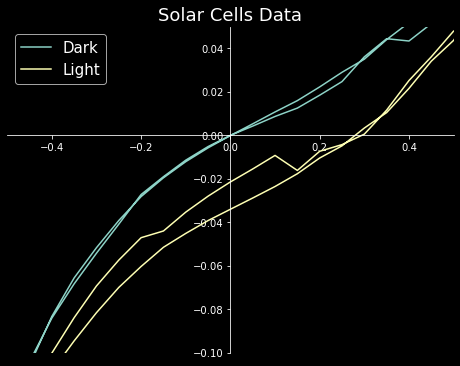

In [78]:
fig = plt.figure(figsize=(8,6)) #figure size
ax = fig.add_subplot(111)

plt.title('Solar Cells Data', fontsize = 18)

plt.plot(voltage_dark, 1e3*current_dark, label = 'Dark') #plotting
plt.plot(voltage_light, 1e3*current_light, label = 'Light')

plt.xlim([-0.5, 0.5])
plt.ylim([-0.1, 0.05])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


plt.show()

In [75]:
df.sort_values(by = ['AV'], axis = 0)

,AI,AV,RESISTANCE,Unnamed: 3,AI.1,AV.1,Unnamed: 6
40,-0.001297,-1.00,771.1193,-0.064841,-0.001888,-1.00,-0.094375
41,-0.001298,-1.00,770.3999,-0.064901,-0.001864,-1.00,-0.093183
42,-0.001049,-0.95,905.5669,-0.052453,-0.001515,-0.95,-0.075755
39,-0.001048,-0.95,906.9104,-0.052376,-0.001584,-0.95,-0.079194
43,-0.000837,-0.90,1075.9000,-0.041825,-0.001191,-0.90,-0.059571
...,...,...,...,...,...,...,...
79,0.000243,0.90,3706.5000,0.012141,0.000211,0.90,0.010566
80,0.000278,0.95,3413.9000,0.013914,0.000245,0.95,0.012257
1,0.000299,0.95,3178.8000,0.014943,0.000266,0.95,0.013305
0,0.000350,1.00,2859.6000,0.017485,0.000302,1.00,0.015089


In [76]:
df.groupby(['AV']).mean()

,AI,RESISTANCE,Unnamed: 3,AI.1,AV.1,Unnamed: 6
AV,,,,,,
-1.00,-0.001297,770.75960,-0.064871,-1.875600e-03,-1.00,-0.093779
-0.95,-0.001048,906.23865,-0.052414,-1.549500e-03,-0.95,-0.077475
-0.90,-0.000837,1075.70000,-0.041833,-1.243650e-03,-0.90,-0.062183
-0.85,-0.000662,1283.45000,-0.033114,-9.714360e-04,-0.85,-0.048571
-0.80,-0.000506,1581.50000,-0.025301,-7.403343e-04,-0.80,-0.037017
-0.75,-0.000398,1886.80000,-0.019881,-5.581218e-04,-0.75,-0.027906
-0.70,-0.000312,2244.00000,-0.015597,-3.978374e-04,-0.70,-0.019892
-0.65,-0.000254,2557.20000,-0.012709,-2.952264e-04,-0.65,-0.014761
-0.60,-0.000208,2878.90000,-0.010421,-2.217168e-04,-0.60,-0.011086


In [ ]:
# find max power and max V,I respectively
#Draw square